# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obiasvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This biaslog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


### Here we import pandas and numpy for mathematical calculations and matplotllibiasias for plotting and seabiasorn for graphical explanations
### Import the dataset and print first five data items

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import math


df=pd.read_csv('D:\\NJIT\\spring23\\datamining\\CS634_assignments\\assignment2\\nyc_bb_bicyclist_counts.csv')
df.head()

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807


### Here we will biase alotting values to the variables X and Y and normalizing them by finding mean and standard deviation.
### Then we will initialize the bias and weights which are parameters for gradient descent algorithm

In [133]:
X2=df[['HIGH_T','LOW_T','PRECIP']]
Y=df['BB_COUNT']
Y=np.array((Y-Y.mean())/Y.std())
# axis 0 - applying lambda functionto each column
X=X.apply(lambda val:(val-val.mean())/val.std(),axis=0)





In [134]:
def initialize(dim):
    bias=random.random()
    weight=np.random.rand(dim)
    return bias,weight
bias,weight=initialize(3)
print("Bias: ",bias,"Weights: ",weight)

Bias:  0.5865212023968106 Weights:  [0.34626534 0.38018129 0.60852007]


Y_pred_function (Y2) = (w * x) + b
Here, x is the independent variable
      y is the dependent variable
      w is the weight associated with input variable
      b is the bias

In [135]:
def predict_Y(bias,weight,X):
    return bias + np.dot(X,weight)
Y_pred=predict_Y(bias,weight,X)
Y_pred[0:10]

array([-1.58031196, -0.88035647, -0.4363417 ,  0.77978868, -0.64609231,
       -0.19280167, -1.25309111, -1.13191344, -0.58697047,  0.0848426 ])

# Cost function 
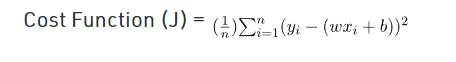

In [136]:

def cost_function(Y,Y_pred):
    Y_result=Y-Y_pred
    # print(Y_result)
    return np.sum((Y-Y_result)**2)/len(Y)
Y_pred=predict_Y(bias,weight,X)
cost_function(Y,Y_pred)

1.1077514235238037

# Reduce cost function by updating weights and biases using mathematical equation of gradient descent algorithm.

In [137]:
len(X.T)

3

# Partial derivatives of weight and bias using cost function
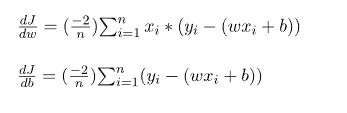


In [138]:
def update_weight(X22222222,y,Y_pred,bias_0,weight_o,learning_rate):
    dw = np.sum(np.dot((y-Y_pred),x))*(-2)/len(y)
    db = np.sum(y-Y_pred)*(-2)/len(y)
    bias_1=bias_0-learning_rate*db
    weight_1=weight_o-learning_rate*dw
    return bias_1,weight_1

In [139]:
print("After initialization -Bias: ",bias,"w: ",weight)
Y_pred=predict_Y(bias,weight ,X)
bias,weight =update_weight(X,Y,Y_pred,bias,weight,0.05)
print("After first update -Bias: ",bias,"weight: ",weight)
cost_function(Y,Y_pred)

After initialization -Bias:  0.5865212023968106 w:  [0.34626534 0.38018129 0.60852007]
After first update -Bias:  0.5278690821571296 weight:  [0.19244632 0.22636227 0.45470105]


1.1077514235238037

#### Assume some random larning rate and run some 'n' no of iterations to optimize bias and weights

In [144]:
def run_gradient_descent(X,Y,learning_rate,num_iterations):
    bias,weight=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for i in range(num_iterations):
        Y_pred=predict_Y(bias,weight,X)
        this_cost=cost_function(Y,Y_pred)
        prev_bias=bias
        prev_weight=weight
        bias,weight=update_weight(X,Y,Y_pred,prev_bias,prev_weight,learning_rate)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of bias and weight : ",bias,weight)
    return gd_iterations_df,bias,weight


In [145]:
gd_iterations_df,bias,weight=run_gradient_descent(X,Y,learning_rate=0.05,num_iterations=50)
print(gd_iterations_df)

Final Estimate of bias and weight :  0.002725790065984667 [ 0.0611786  -0.12212954  0.42956357]
   iteration      cost
0        0.0  0.990398
1       10.0  0.219552
2       20.0  0.189205
3       30.0  0.185571
4       40.0  0.185130


Text(0, 0.5, 'Cost or MSE')

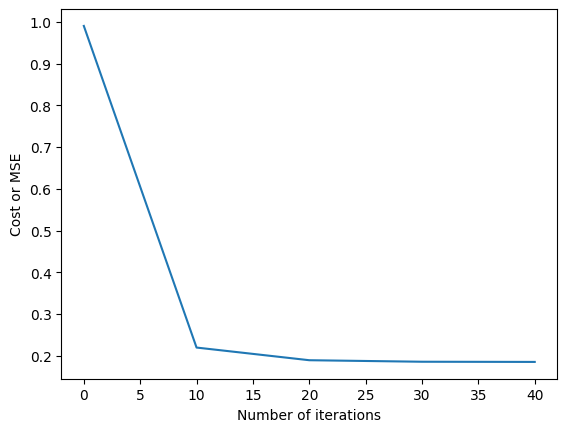

In [146]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

# Assume some second value for the learning rate 'alpha' and check the values again.

In [147]:
gd_iterations_df,bias,weight=run_gradient_descent(X,Y,learning_rate=0.08,num_iterations=50)
print(gd_iterations_df)

Final Estimate of bias and weight :  4.3092685817490065e-05 [-0.14985513  0.21876093  0.08228281]
   iteration      cost
0        0.0  2.145606
1       10.0  0.023389
2       20.0  0.021331
3       30.0  0.021268
4       40.0  0.021266


# Plot the the graph for cost vs iterations with alpha value '0.05'

Text(0, 0.5, 'Cost or MSE')

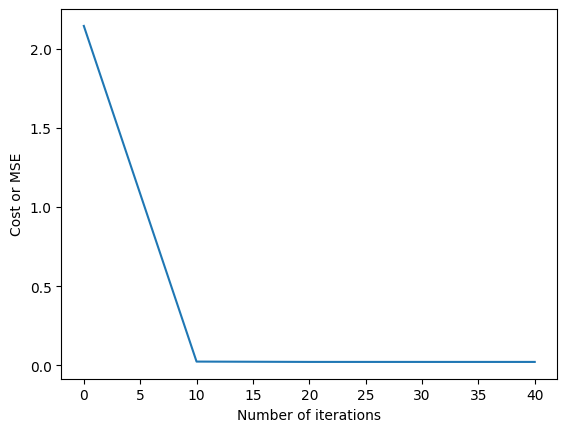

In [148]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

Final Estimate of bias and weight :  0.004262216825281421 [ 0.1554732  -0.03843046  0.01807917]
Final Estimate of bias and weight :  0.00015158654266010036 [-0.16144502  0.25358274  0.02455486]


Text(0.5, 1.0, 'Cost Vs. Iteration functions')

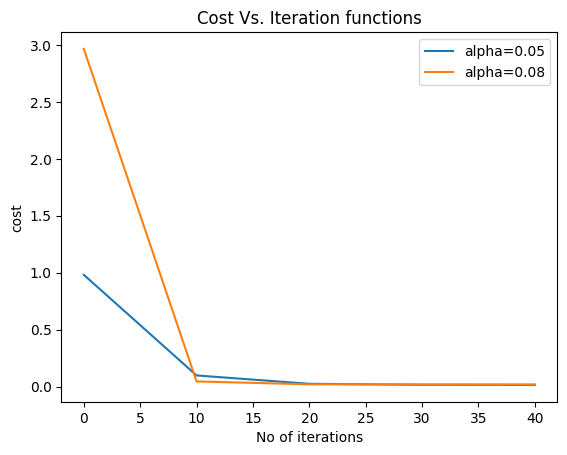

In [149]:
alpha_df_1,bias,weight=run_gradient_descent(X,Y,learning_rate=0.05,num_iterations=50)
alpha_df_2,bias,weight=run_gradient_descent(X,Y,learning_rate=0.08,num_iterations=50)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.05")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.08")
plt.legend()
plt.ylabel('cost')
plt.xlabel('No of iterations')
plt.title('Cost Vs. Iteration functions')

## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the Y_pred with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

### Import all the requires libraries and additionally import SGD regressor to build a model and mean_squared_error for estimating average square of errors

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
df=pd.read_csv('D:\\NJIT\\spring23\\datamining\\CS634_assignments\\assignment2\\nyc_bb_bicyclist_counts.csv')
df.head()


,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807


In [185]:
X2=df[['HIGH_T','LOW_T','PRECIP']]
Y2=df['BB_COUNT']

# Calculate the cost function

In [188]:
def initialize(dim):
    
    weight=np.random.rand(dim)
    return weight
weight=initialize(3)
print("Weights: ",weight)

Weights:  [0.32525422 0.69846282 0.97778965]


In [189]:

print(weight)
def cost_function(X2,Y2,weight):
    Y_pred = np.dot(X2,weight.T)    
    cost = np.sum((Y_pred - Y2) ** 2)/len(Y2)
    return cost
cost_function(X2,Y2,weight)


[0.32525422 0.69846282 0.97778965]


7546412.357835641

# Obtain mean square error to confirm whether it matches with cost function

In [190]:
mean_squared_error(np.dot(X2,weight.T),Y2)

7546412.357835641

### Normalize all the features 

In [191]:
X_normal = (X2 - X2.min()) / (X2.max() - X2.min())
X2 = X_normal

# Implement Stochastic Gradient Descent through Python

In [193]:
def stocashtic_gradient_descent(X2,y,weight,learning_rate=0.01,iterations=10):
    Y_len = len(y)
    cost_hist = np.zeros(iterations)
    
    
    for it in range(iterations):
        for i in range(Y_len):
            random_idx = np.random.randint(len(Y2))
            X_i = X2[random_idx:random_idx+1]
            y_i = Y2[random_idx:random_idx+1]
            Y_pred = np.dot(X_i,weight)

            weight = weight -(1/Y_len)*learning_rate*( X_i.T.dot((Y_pred - y_i)))
            cost_hist[it] = cost_function(X_i,y_i,weight)
        
    return weight, cost_hist

In [194]:
new_weight,cost_hist = stocashtic_gradient_descent(X2,Y2,weight)

### Calculating the mean squred error

In [195]:
mean_squared_error(np.dot(X2,new_weight.T),Y2)


6892628.843262947

# Plot the Graph using range and cost function History

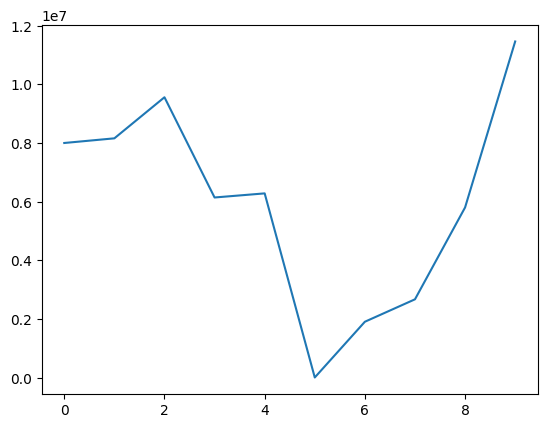

In [196]:
plt.plot(range(10),cost_hist)
plt.show()